# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [46]:
# Carreguando os dados do arquivo CSV 'SINASC_RO_2019.csv' para um DataFrame chamado sinasc_raw
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

# Exibindo as primeiras linhas do DataFrame para ter uma visão inicial dos dados
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [47]:
# Exibindo os nomes das colunas no DataFrame sinasc_raw
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [48]:
# Criando um novo DataFrame chamado sinasc_mun, selecionando apenas as colunas 'munResNome', 'IDADEMAE' e 'IDADEPAI' do DataFrame sinasc_raw
sinasc_mun = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]

# Exibindo o DataFrame sinasc_mun para visualizar as primeiras linhas e verificar a seleção de colunas
sinasc_mun

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0
...,...,...,...
27023,Vilhena,32,35.0
27024,Chupinguaia,19,NaN
27025,Vilhena,24,30.0
27026,Vilhena,21,24.0


In [49]:
# Agrupando o DataFrame sinasc_mun pelos valores únicos na coluna 'munResNome' e calcule a média para cada grupo
# Isso cria um novo DataFrame que mostra a média das idades da mãe (IDADEMAE) e do pai (IDADEPAI) para cada município de residência (munResNome)
sinasc_mun.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [50]:
# Filtrando as entradas do DataFrame sinasc_raw onde a data de nascimento (DTNASC) é 2019-12-01
# Agrupando esses dados pelo nível de escolaridade da mãe (ESCMAE) e calcule o peso médio de nascimentos para cada grupo
# Convertendo o resultado em um DataFrame para melhor visualização
sinasc_raw[sinasc_raw['DTNASC'] == '2019-12-01'].groupby('ESCMAE')['PESO'].mean().to_frame()

,PESO
ESCMAE,
1 a 3 anos,3025.000000
12 anos ou mais,3341.333333
4 a 7 anos,3204.583333
8 a 11 anos,3344.692308
Nenhuma,3370.000000


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [51]:
# Contando o número de ocorrências de cada valor único na coluna 'munResNome' do DataFrame sinasc_raw
# Convertendo os resultados em um DataFrame para melhor visualização
# Ordenando o DataFrame pelo número de ocorrências em ordem crescente
# Selecionando as primeiras 5 linhas (os 5 municípios com menor número de ocorrências) e exiba o resultado
sinasc_raw['munResNome'].value_counts().to_frame().sort_values('munResNome')[:5]

,munResNome
Município ignorado - RO,1
Castanheiras,32
Pimenteiras do Oeste,40
Primavera de Rondônia,43
Parecis,44


In [52]:
# Filtrando o DataFrame sinasc_mun para incluir apenas as entradas onde 'munResNome' é igual a 'Castanheiras'
# Agrupando esses dados pelo município de residência ('munResNome') e calcular a média, mínimo e máximo das idades da mãe e do pai
sinasc_mun[sinasc_mun['munResNome'] == 'Castanheiras'].groupby('munResNome').agg([
    ('média', 'mean'),  # Calcula a média das idades da mãe e do pai
    ('mínima', 'min'),  # Encontra a idade mínima da mãe e do pai
    ('máxima', 'max')   # Encontra a idade máxima da mãe e do pai
])

IDADEMAE                 IDADEPAI              
                 média mínima máxima      média mínima máxima
munResNome                                                   
Castanheiras  27.28125     17     39  30.392857   17.0   43.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [53]:
# Criando uma cópia do DataFrame sinasc_raw chamada sinasc_mar
sinasc_mar = sinasc_raw.copy()

# Convertendo a coluna 'DTNASC' para o formato de data e hora usando a função pd.to_datetime
sinasc_mar['DTNASC'] = pd.to_datetime(sinasc_mar['DTNASC'])

# Exibindo a coluna 'DTNASC' após a conversão para verificar as alterações
sinasc_mar['DTNASC']
# Crie uma cópia do DataFrame sinasc_raw chamada sinasc_mar
sinasc_mar = sinasc_raw.copy()

# Convertendo a coluna 'DTNASC' para o formato de data e hora usando a função pd.to_datetime
sinasc_mar['DTNASC'] = pd.to_datetime(sinasc_mar['DTNASC'])

# Exibindo a coluna 'DTNASC' após a conversão para verificar as alterações
sinasc_mar['DTNASC']


0       2019-02-19
1       2019-02-21
2       2019-02-25
3       2019-03-20
4       2019-03-23
           ...    
27023   2019-12-13
27024   2019-10-04
27025   2019-08-02
27026   2019-12-23
27027   2019-12-27
Name: DTNASC, Length: 27028, dtype: datetime64[ns]

In [13]:
# Filtrando o DataFrame sinasc_mar para incluir apenas as entradas onde o mês da data de nascimento (DTNASC) é igual a 3 (março)
# Contando o número de ocorrências para cada valor único na coluna 'munResNome' e convertê-lo em um DataFrame
sinasc_mar[sinasc_mar.index.month == 3]["munResNome"].value_counts().to_frame()

,munResNome
Porto Velho,744
Ji-Paraná,188
Vilhena,148
Ariquemes,141
Cacoal,133
Jaru,80
Guajará-Mirim,75
Rolim de Moura,69
Ouro Preto do Oeste,67
Pimenta Bueno,62


In [54]:
# Filtrando o DataFrame sinasc_mar para incluir apenas as entradas onde 'munResNome' é igual a 'Porto Velho'
# Selecionando as colunas 'munResNome' e 'QTDFILVIVO' para análise
# Agrupando esses dados pelo município de residência ('munResNome') e calcular a contagem, média, mínimo e máximo da quantidade de filhos vivos
sinasc_mar[sinasc_mar['munResNome'] == 'Porto Velho'][['munResNome', 'QTDFILVIVO']] \
    .groupby('munResNome') \
    .agg([
        ('qtd', 'count'),  # Contagem do número de ocorrências
        ('média', 'mean'),  # Calcula a média da quantidade de filhos vivos
        ('mínima', 'min'),  # Encontra a quantidade mínima de filhos vivos
        ('máxima', 'max')   # Encontra a quantidade máxima de filhos vivos
    ])

QTDFILVIVO                        
                   qtd     média mínima máxima
munResNome                                    
Porto Velho       7319  1.167236    0.0   12.0

In [18]:
# Filtrando o DataFrame sinasc_mar para incluir apenas as entradas onde 'munResNome' é igual a 'Porto Velho'
# Selecionando as colunas 'munResNome' e 'IDADEPAI' para análise
# Agrupando esses dados pelo município de residência ('munResNome') e calcular a média, mínimo e máximo da idade do pai
sinasc_mar[sinasc_mar['munResNome'] == 'Porto Velho'][['munResNome', 'IDADEPAI']] \
    .groupby('munResNome') \
    .agg([
        ('média', 'mean'),  # Calcula a média da idade do pai
        ('mínima', 'min'),  # Encontra a idade mínima do pai
        ('máxima', 'max')   # Encontra a idade máxima do pai
    ])

IDADEPAI              
                 média mínima máxima
munResNome                          
Porto Velho  32.352679   16.0   65.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [55]:
# Exibindo os tipos de dados de cada coluna no DataFrame sinasc_raw
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [56]:
# Selecionando as colunas no DataFrame sinasc_raw que não são do tipo 'int64' ou 'float64'
sinasc_raw.select_dtypes(exclude=['int64', 'float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [57]:
# Criando uma cópia do DataFrame sinasc_raw chamada sinasc_parto
sinasc_parto = sinasc_raw.copy()

# Convertendo a coluna 'DTNASC' para o formato de data e hora usando a função pd.to_datetime
sinasc_parto['DTNASC'] = pd.to_datetime(sinasc_parto['DTNASC'])

# Definindo a coluna 'DTNASC' como o índice do DataFrame sinasc_parto
sinasc_parto = sinasc_parto.set_index('DTNASC')

In [58]:
# Criando uma nova coluna 'DIASEMANA' no DataFrame sinasc_parto, representando o dia da semana da data de nascimento
sinasc_parto['DIASEMANA'] = sinasc_parto.index.dayofweek

# Exibindo a coluna 'DIASEMANA' para visualizar os dias da semana associados a cada data de nascimento
sinasc_parto['DIASEMANA']

DTNASC
2019-02-19    1
2019-02-21    3
2019-02-25    0
2019-03-20    2
2019-03-23    5
             ..
2019-12-13    4
2019-10-04    4
2019-08-02    4
2019-12-23    0
2019-12-27    4
Name: DIASEMANA, Length: 27028, dtype: int64

In [59]:
# Executando a operação groupby no DataFrame sinasc_parto, contando o número de ocorrências para cada combinação de 'DIASEMANA' e 'PARTO'
result = sinasc_parto[['DIASEMANA', 'PARTO']].groupby('DIASEMANA')['PARTO'].count()

# Exibindo os índices do resultado para visualizar os dias da semana associados ao número de ocorrências de nascimentos
print(result.index)

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='DIASEMANA')


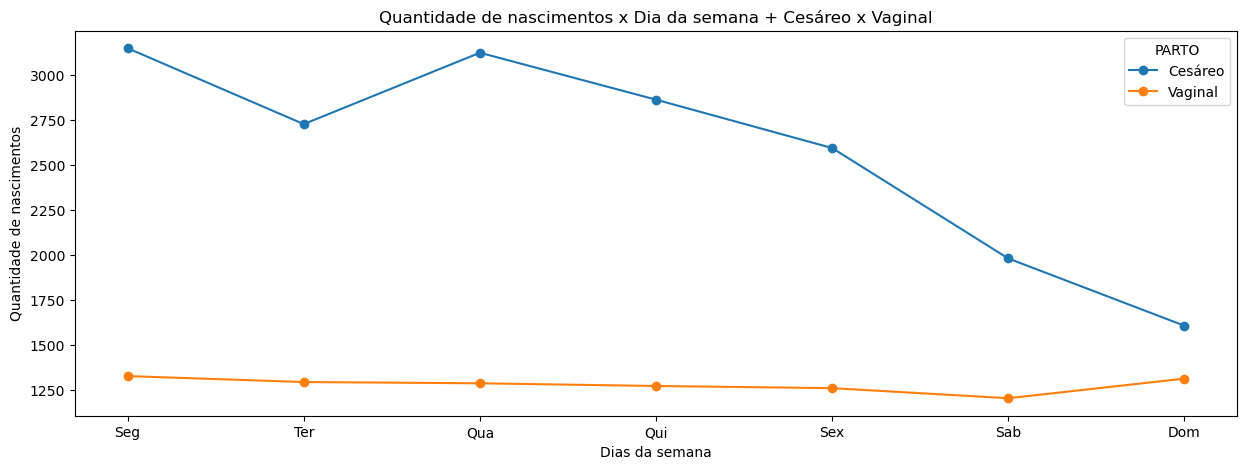

In [61]:
# Executando a operação groupby e conte os valores
result = sinasc_parto[['DIASEMANA', 'PARTO']].groupby(['DIASEMANA', 'PARTO'])['PARTO'].count().unstack()

# Criando o gráfico de linhas
fig, ax = plt.subplots(figsize=[15, 5])
result.plot(ax=ax, marker='o', linestyle='-')

# Configurando o eixo x
ax.set_xticks(range(len(result.index)))
ax.set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'], rotation=0)

# Adicionando título e rótulos aos eixos
plt.title('Quantidade de nascimentos x Dia da semana + Cesáreo x Vaginal')
plt.xlabel('Dias da semana')
plt.ylabel('Quantidade de nascimentos')

# Exibindo o gráfico
plt.show()

### Insights da Analise

    Ao observarmos o gráfico, podemos perceber que os partos cesáreos acontecem predominantemente do início até o meio da semana (entre segunda e quarta-feira), indicando que há uma preferência para o agendamento desse tipo de parto. Já no caso do parto normal (vaginal), a tendência é que haja um aumento nos fins de semana, com ênfase no domingo, que vai em contra mão aos partos cesáreos que apresentam uma queda expressiva nesse mesmo dia.